In [1]:
import os
import subprocess
import re
import json
import numpy as np
import pandas as pd
import glob
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_folder = '../data/hydrated_tweets/og_tweets'

In [3]:
os.listdir(data_folder)

['og_2020.jsonl', 'og_2016.jsonl', 'og_ids.txt', 'og_2020_ids.txt']

In [4]:
file_2020 = os.path.join(data_folder, 'og_2020.jsonl')
file_2016 = os.path.join(data_folder, 'og_2016.jsonl')

In [5]:
with open(file_2020) as f:
    tweets_2020 = f.readlines()
tweets_2020 = [json.loads(tweet) for tweet in tweets_2020]

In [6]:
len(tweets_2020)

86176

In [7]:
with open(file_2016) as f:
    tweets_2016 = f.readlines()
tweets_2016 = [json.loads(tweet) for tweet in tweets_2016]

In [8]:
len(tweets_2016)

83580

In [9]:
def get_date(tweet):
    return datetime.datetime.strptime(tweet['created_at'], '%a %b %d %X %z %Y').date()

In [10]:
def get_discussion(tweet):
    return tweet['favorite_count']+ tweet['retweet_count']

In [11]:
%%time
twt_dic_2020 = {}
for tweet in tweets_2020:
    date = get_date(tweet)
    if date in twt_dic_2020:
        twt_dic_2020[date].append(tweet)
    else:
        twt_dic_2020[date] = [tweet]

twt_dic_2016 = {}
for tweet in tweets_2016:
    date = get_date(tweet)
    if date in twt_dic_2016:
        twt_dic_2016[date].append(tweet)
    else:
        twt_dic_2016[date] = [tweet]

CPU times: user 3.71 s, sys: 445 ms, total: 4.15 s
Wall time: 4.15 s


In [12]:
list(twt_dic_2020.keys())[0]

datetime.date(2020, 9, 21)

In [13]:
disc_2020 = {}
for date in twt_dic_2020:
    tweet_lst = twt_dic_2020[date]
    discussion_lst = np.array([get_discussion(tweet) for tweet in tweet_lst])
    disc_2020[date] = discussion_lst
    
disc_2016 = {}
for date in twt_dic_2016:
    tweet_lst = twt_dic_2016[date]
    discussion_lst = np.array([get_discussion(tweet) for tweet in tweet_lst])
    disc_2016[date] = discussion_lst
    


In [14]:
# plt.hist(np.log(disc_2020[datetime.date(2020, 9, 21)] + 1))

In [15]:
disc_by_day_20 = {}
disc_by_day_16 = {}
for date in disc_2020:
    disc_by_day_20[date] = disc_2020[date].sum()
for date in disc_2016:
    disc_by_day_16[date] = disc_2016[date].sum()

In [16]:
log_disc_20 = {}
log_disc_16 = {}
for date in disc_by_day_20:
    log_disc_20[date] = np.log(disc_by_day_20[date] + 1)
for date in disc_by_day_16:
    log_disc_16[date] = np.log(disc_by_day_16[date] + 1)

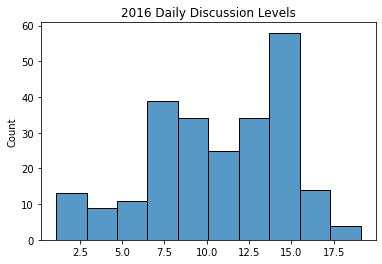

In [17]:
disc_2016_plot = sns.histplot(log_disc_16.values(), legend=False).set_title("2016 Daily Discussion Levels")

Text(0.5, 1.0, '2020 Daily Discussion Levels')

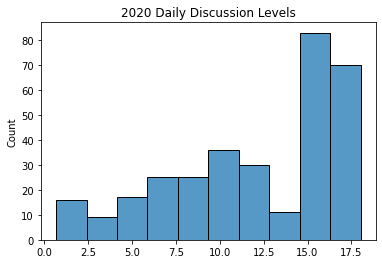

In [18]:
sns.histplot(log_disc_20.values(), legend=False).set_title("2020 Daily Discussion Levels")

Text(0.5, 0, 'Daily Discussion')

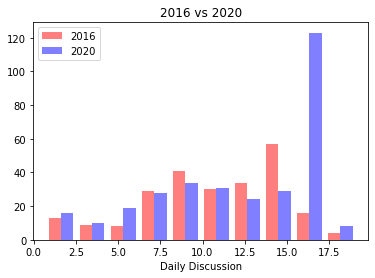

In [19]:
plt.hist([list(log_disc_16.values()), list(log_disc_20.values())], color=['r','b'], alpha=0.5)
plt.legend(['2016', '2020'])
plt.title("2016 vs 2020")
plt.xlabel("Daily Discussion")

Text(0.5, 1.0, '2016 Daily Discussion Levels')

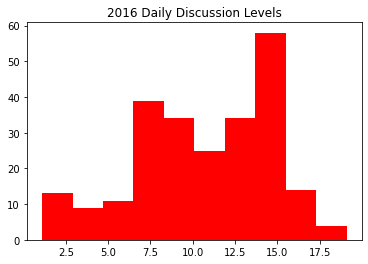

In [20]:
plt.hist(log_disc_16.values(), color='red')
plt.title("2016 Daily Discussion Levels")

Text(0.5, 1.0, '2020 Daily Discussion Levels')

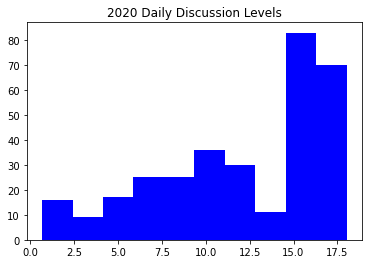

In [21]:
plt.hist(log_disc_20.values(), color='blue')
plt.title("2020 Daily Discussion Levels")

In [26]:
np.array(list(log_disc_16.values())).mean()

10.676986015460773

In [25]:
(13.42 - 10.67) / 4

0.6875

In [29]:
np.median(np.array(list(log_disc_16.values())))

11.296037307818526

In [27]:
np.array(list(log_disc_20.values())).mean()

12.039310852341861

In [30]:
np.median(np.array(list(log_disc_20.values())))

13.42418895097337

In [24]:
for key in tweets_2016[0]:
    print(key)

created_at
id
id_str
full_text
truncated
display_text_range
entities
extended_entities
source
in_reply_to_status_id
in_reply_to_status_id_str
in_reply_to_user_id
in_reply_to_user_id_str
in_reply_to_screen_name
user
geo
coordinates
place
contributors
is_quote_status
retweet_count
favorite_count
favorited
retweeted
possibly_sensitive
lang


In [13]:
disc_2016 = {}
for tweet in tweets_2016:
    date = get_date(tweet)
    discussion = get_discussion(tweet)
    if date in disc_2016:
        disc_2016[date] += discussion
    else:
        disc_2016[date] = discussion

In [13]:
med_2016 = np.median(np.array(list(disc_2016.values())))
std_2016 = np.array(list(disc_2016.values())).std()

In [14]:
norm_2016 = {}
for elem in disc_2016:
    norm_2016[elem] = (disc_2016[elem] - med_2016) / std_2016

(array([236.,   3.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([-5.95801687e-03,  1.44445505e+00,  2.89486813e+00,  4.34528120e+00,
         5.79569427e+00,  7.24610734e+00,  8.69652041e+00,  1.01469335e+01,
         1.15973466e+01,  1.30477596e+01,  1.44981727e+01]),
 <BarContainer object of 10 artists>)

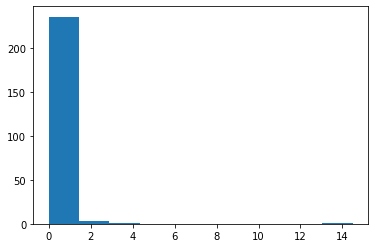

In [15]:
dates_2016,values_2016 = zip(*sorted(norm_2016.items()))

plt.hist(values_2016)

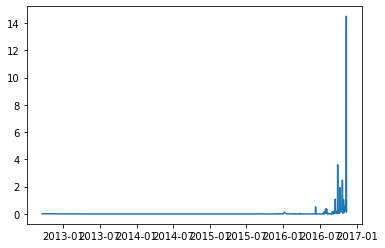

In [16]:
plt.plot(dates_2016, values_2016)

In [17]:
disc_2020 = {}
for tweet in tweets_2020:
    date = get_date(tweet)
    discussion = get_discussion(tweet)
    if date in disc_2020:
        disc_2020[date] += discussion
    else:
        disc_2020[date] = discussion

In [18]:
med_2020 = np.median(np.array(list(disc_2020.values())))
std_2020 = np.array(list(disc_2020.values())).std()

In [19]:
norm_2020 = {}
for elem in disc_2020:
    norm_2020[elem] = (disc_2020[elem] - med_2020) / std_2020

(array([204.,  59.,  32.,  11.,  10.,   1.,   2.,   1.,   1.,   1.]),
 array([-0.06938404,  0.61372377,  1.29683158,  1.97993938,  2.66304719,
         3.346155  ,  4.02926281,  4.71237062,  5.39547843,  6.07858624,
         6.76169405]),
 <BarContainer object of 10 artists>)

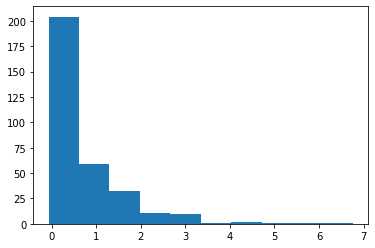

In [20]:
dates_2020,values_2020 = zip(*sorted(norm_2020.items()))

plt.hist(values_2020)

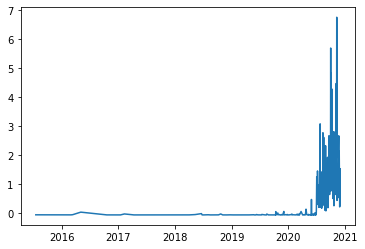

In [21]:
plt.plot(dates_2020, values_2020)

In [22]:
med_2016

80501.0

In [23]:
med_2020

676675.5